<p> The document you are reading is broken up into "cells". Each cell is python code that can be executed by selecting the cell and pressing <code>SHIFT-ENTER</code>.  </p>



# Simulate Sun + Jupiter

Note that everything after a # symbol is an explanatory comment.

In [1]:
import rebound  #Tells python to use REBOUND, which is a code to integrate planets
import numpy as np #Tells python to use numpy (a common python science package)
import matplotlib.pyplot as plt #For plots
%matplotlib inline

In [2]:
sim = rebound.Simulation() #we are naming our simulation 'sim'
sim.units = ('yr', 'AU', 'Msun') #this makes time in years, distances in AU, and mass in Sun's mass

Next, we can add each object that we want to simulate one at a time with the <code>add</code> method. We initialize two bodies (Sun+Jupiter) by giving rebound their masses and distance.

In [3]:
sim.add(m=1) # Adds Sun (mass=1)
sim.add(m=0.001, a=5.20) # Jupiter (mass=.001*mass of Sun, distance=5.2AU)
sim.move_to_com() # This allows us to work in the center of mass frame.  If you don't do this, all particles can drift together

In the above, m is the mass divided by the Sun's mass
and a is the semimajor axis (which is roughly the average distance to the Sun) in units of astronomical units (AU; with Earth being at 1 AU). 

We can check on the status of all of our objects with the <code>status</code> method:

In [4]:
sim.status()

---------------------------------
REBOUND version:     	3.5.12
REBOUND built on:    	Mar 25 2018 17:02:53
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.005194805194805196 y=0.0 z=0.0 vx=0.0 vy=-0.0027539303707624497 vz=0.0>
<rebound.Particle object, m=0.001 x=5.194805194805195 y=0.0 z=0.0 vx=0.0 vy=2.753930370762449 vz=0.0>
---------------------------------


<p> You should have 2 "particles" (i.e the Sun and Jupiter). Each particle has a mass (m), a position in three dimensional space (x,y,z) and a velocity in three dimensional space (vx,vy,vz). These are the initial <b>positions</b> and <b>velocities</b> for a our simulation. </p>


Now let's evolve our mini Solar System forward by 20 years, while outputting Jupiter's position 1000 times.

In [6]:
Noutputs = 1000;
times = np.linspace(0,20,Noutputs) # This sets the "times" variable to be an array made up of 1000 evenly spaced output times between 0 and 20.
x_Jupiter = np.zeros(Noutputs) #This makes an array made up of zeros. We will be 'filling up' this array shortly with the x-position of Jupiter
y_Jupiter = np.zeros(Noutputs)
x_Sun = np.zeros(Noutputs)
y_Sun = np.zeros(Noutputs)
vx_sun = np.zeros(Noutputs) #x-velocity of the Sun

If you're not sure what something is (e.g., what "times" is equal to here), you can easily evaluate it.  To do so, click on "Insert" above, then "Insert cell Below", then type "times" followed by shift+enter. 

The following is the simulation.  We have a "for" loop that runs through all the times in the times array, simulating the planets up to each time.

In [7]:
for i,t in enumerate(times): #each time through the loop, set i=0,1,... and t=times[0],times[1].,,
    sim.integrate(t)         # Integrate up to time t
    x_Jupiter[i] = sim.particles[1].x  # Jupiter is particle 1 in the list of particles. And the ".x" at the end says to use the x-position    
    y_Jupiter[i] = sim.particles[1].y
    x_Sun[i] = sim.particles[0].x #The Sun is particle 0
    y_Sun[i] = sim.particles[0].y
    vx_sun[i] = sim.particles[0].vx 

Now that we have Jupiter's postion at each time let's plot it. 

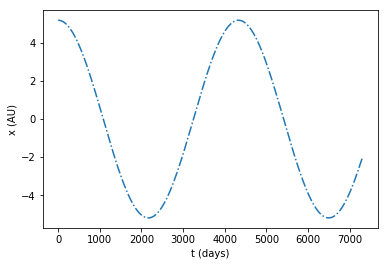

In [8]:
plt.plot(times*365.25,x_Jupiter,'-.'); #the factor 365.25 is to convert from years to days
plt.xlabel('t (days)'); plt.ylabel('x (AU)');

Let's plot Jupiter's orbit (x vs. y):

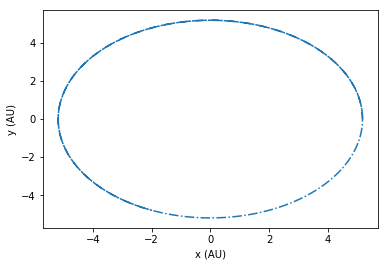

In [9]:
plt.plot(x_Jupiter,y_Jupiter,'-.');
plt.xlabel('x (AU)'); plt.ylabel('y (AU)');

Now let's plot the Sun's orbit (x vs. y):

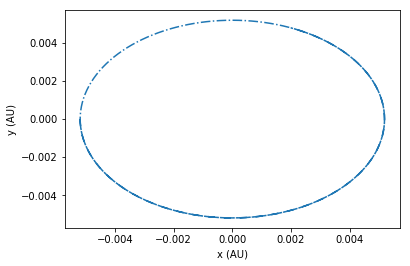

In [10]:
plt.plot(x_Sun,y_Sun,'-.');
plt.xlabel('x (AU)'); plt.ylabel('y (AU)');

And let's plot the Sun's y-velocity:

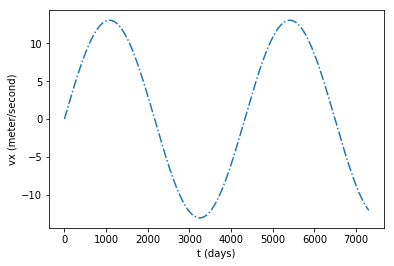

In [11]:
plt.plot(times*365.25,vx_sun*4743.7,'-.');#The number 4743.7 converts from AU/yr to meter/second
plt.xlabel('t (days)'); plt.ylabel('vx (meter/second)');